In [2]:
import pandas as pd

In [4]:
raw_data = pd.read_csv('spotify-2023.csv', encoding='latin-1')

In [6]:
raw_data.head(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,141,C#,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,148,F,Minor,67,83,76,48,0,8,3
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,...,100,F,Major,67,26,71,37,0,11,4
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,130,C#,Minor,85,22,62,12,0,28,9
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,170,D,Minor,81,56,48,21,0,8,33


In [8]:
raw_data.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

track_name: categorical, describes the name of the track
artist(s)_name': categorical, describes the name of the track's artist(s)
artist_count: numerical, describes  how many artists are in a single track
released_year': numerical, describes year of release
released_month': numerical
released_day': numerical
in_spotify_playlists': numerical, describes the number of savings in spotify playlists, number of savings
in_spotify_charts': numerical, describes the number of occurences in spotify charts
streams': numerical, total number of streams for the tracks -> Target Variable
in_apple_playlists: numerical, describes the number of savings in Apple playlists
in_apple_charts': numerical, describes the number of occurences in Apple charts
in_deezer_playlists': numerical, describes the number of savings in Deezer playlists
in_deezer_charts': numerical, describes the number of occurences in Deezer charts
in_shazam_charts': numerical, describes the number of occurences in Shazam charts
bpm: numerical, beat per minute, describes the number of beats of per minute for the track
key: categorical, describes the key used for the track
mode: categorical, describes the mode
danceability_%: numerical, how good can you dance to the track, %
valence_%: numerical, %
energy_%: numerical, describes how energetic the track is, %
acousticness_%: numerical, %
instrumentalness_%: numerical, %
liveness_%: numerical, %
speechiness_%: numerical, %

We want to use every variable possible to enhance the predictability of our model, however we need to exclude categorical variables such as track_name and artist(s)_name since they won't fit properly into the model. we aim to convert the variables "key" and "mode" to numerical using one-hot encoding.

We can use Random Forests model or Decision Tree model since they offer reliability and flexibility(especially Decision Trees), however they are heavy on the computiotional side but that is no problem for us since our dataset is quite small.

In [11]:
raw_data['in_spotify_playlists'].mean()

0    C#
Name: key, dtype: object

In [13]:
raw_data['key'].mode()

0    2022
Name: released_year, dtype: int64

In [14]:
raw_data['released_year'].mode()

0    2022
Name: released_year, dtype: int64

To better understand the distribution of the data, we can plot all the years and their corresponding occurences on a bar chart

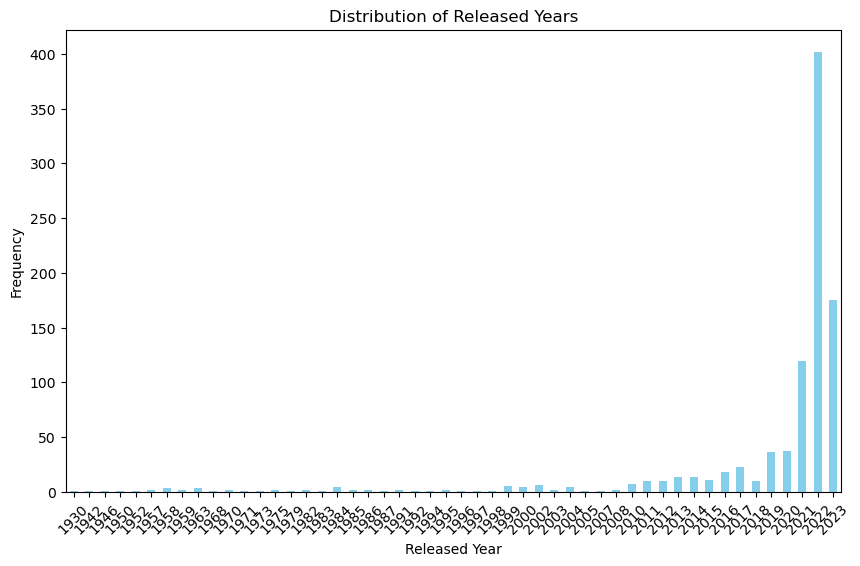

In [16]:
import matplotlib.pyplot as plt

# Count occurrences of each unique value in the 'released_year' column
year_counts = raw_data['released_year'].value_counts()

# Sort the counts by index (year) for better visualization
year_counts_sorted = year_counts.sort_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
year_counts_sorted.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.xlabel('Released Year')
plt.ylabel('Frequency')
plt.title('Distribution of Released Years')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the bar chart
plt.show()


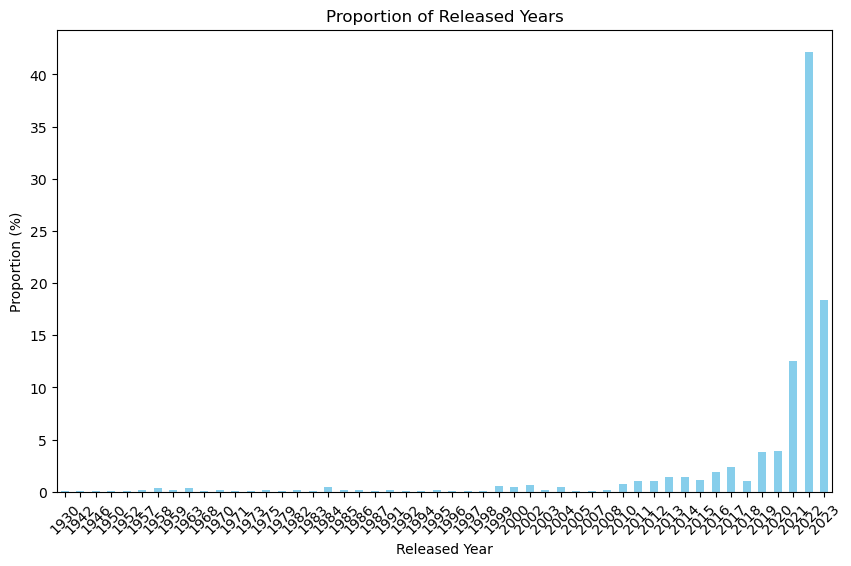

In [17]:
import matplotlib.pyplot as plt

# Count occurrences of each unique value in the 'released_year' column
year_counts = raw_data['released_year'].value_counts()

# Calculate the proportion of each category
year_proportions = year_counts / year_counts.sum() * 100

# Sort the proportions by index (year) for better visualization
year_proportions_sorted = year_proportions.sort_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
year_proportions_sorted.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.xlabel('Released Year')
plt.ylabel('Proportion (%)')
plt.title('Proportion of Released Years')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the bar chart
plt.show()


In [20]:
# Calculate the minimum and maximum values in the 'in_spotify_playlists' column
min_value = raw_data['in_deezer_charts'].min()
max_value = raw_data['in_deezer_charts'].max()

# Display the range
print("Range of 'in_deezer_charts' column: min: {} to max: {}".format(min_value, max_value))


Range of 'in_deezer_charts' column: min: 0 to max: 58


In [21]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    int64 
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

For Task 4:
we need to do the following:
- in_shazam_charts -> fill the null values
- key -> fill the null values
- in_shazam_charts -> convert to int64
- in_deezer_playlists -> convert to int64

Preprocessing: 
- key -> convert to int64 (One Hot Encoding)
- mode -> convert to int64 (One Hot Encoding)